# Amazon Fine Food Reviews

# 1.Business Problem

## 1.1 Problem Statement

<p>
For example we are given with less number of reviews we can say manually whether it is a positive review or negiative review. If we have more number of reviews then we can use a simple classifier and classify the reviews.
<br>
<b>The main aim of the project is we are given reviews, we have to classify the reviews according to the polarity whether the give review is positive or negative.
</b>

</p>

## 1.2 Data Source

The dataset is provided by the <b>Stanford Network Analysis Project(SNAP)</b>

<b> Source:</b><a href="https://www.kaggle.com/snap/amazon-fine-food-reviews" target="_blank">https://www.kaggle.com/snap/amazon-fine-food-reviews</a>

## 1.3 Real-world objectives

1.Minimize the error.<br>
2.Classification must be accurate.<br>

# 2.Machine Learing Problem

## 2.1 Data

The dataset is size of 372MB<br>

Data includes:
- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews

The dataset contains following attributes
- Id-Unique NUmber
- ProductId-ID of product
- UserId-UserID
- ProfileName-Name of profile
- HelpfulnessNumerator- Number of people who found review Helpful
- HelpfulnessDenominator- NUmber of people who indicated whether or not the review was helpful
- Score- Rating of the review 
- Time-Time at which they commneted
- Summary-summary of the whole comment
- Text-The full text about the review

# 3. Performance Metric/KPI

Metrics:
- Confusion Matrix
- Precision
- Recall
- AUCROC
- Accuracy

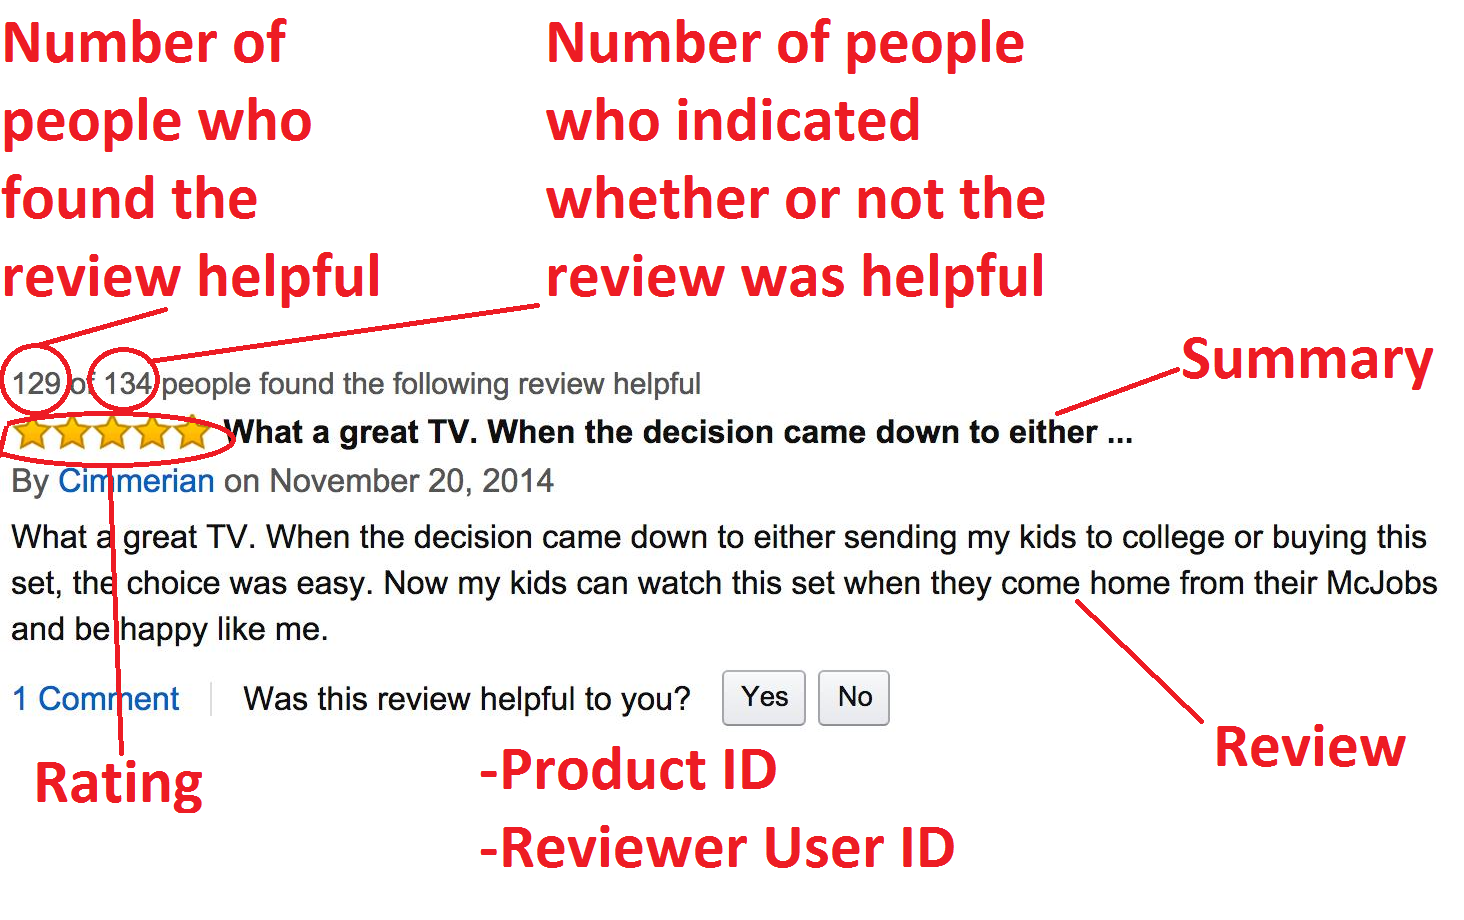

In [5]:
from IPython.display import Image

Image('AmazonReview.png')


# Loading Data

In [6]:
#this tells us about how to load the data

con = sqlite3.connect('database.sqlite')

df = pd.read_sql_query("""
SELECT Score, Summary,Text
FROM Reviews
""", con)

# Exploratory Data Analysis

# Distribution of ratings

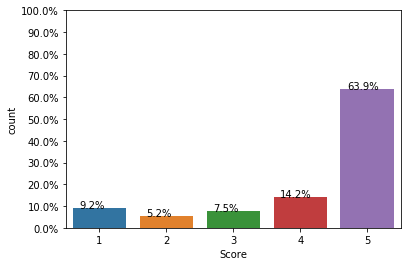

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

con = sqlite3.connect('database.sqlite')

df = pd.read_sql_query("""
SELECT Score, Summary,Text
FROM Reviews
""", con)


x=df['Score']

total = len(df)*1.
ax=sns.countplot(x="Score", data=df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()


<pre>
5-star reviews constitute a large proportion (64%) of all reviews. 
The next most prevalent rating is 4-stars(14%), 
followed by 1-star (9%), 
3-star (8%), 
and finally 2-star reviews (5%).
</pre>

In [3]:
df_m = pd.read_sql_query("""
SELECT *
FROM Reviews
""", con)
df_m.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df_m.shape

(568454, 10)

In [33]:
df1.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [2]:
messages = pd.read_sql_query("""
SELECT Score, Summary,Text
FROM Reviews
WHERE Score != 3 order by Time
""", con)

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

Score = messages['Score']
Score = Score.map(partition)
Text=messages['Text'].tolist()
X_train, X_test, y_train, y_test = train_test_split(Text, Score,test_size=0.3)

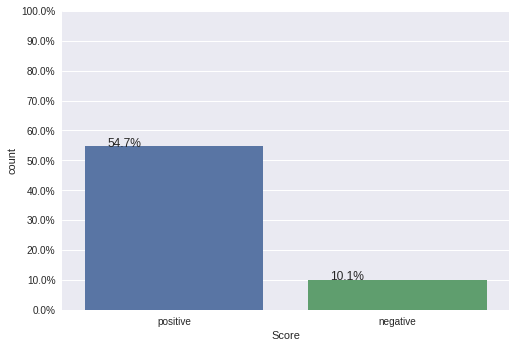

In [6]:
ax=sns.countplot(y_train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

There are more number of positive reviews than negative reviews<br>
The above data is imbalanced dataset

In [34]:
df1 = pd.read_sql_query("""
SELECT HelpfulnessNumerator,HelpfulnessDenominator
FROM Reviews
""", con)
df1.head()

,HelpfulnessNumerator,HelpfulnessDenominator
0,1,1
1,0,0
2,1,1
3,3,3
4,0,0


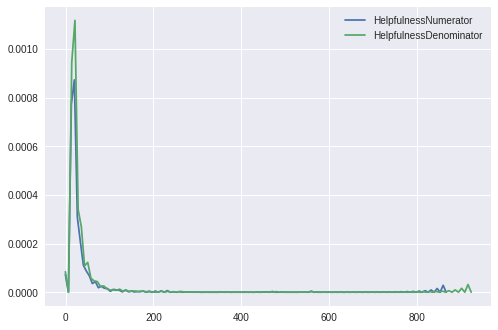

In [35]:
sns.kdeplot(df1['HelpfulnessNumerator'])
sns.kdeplot(df1['HelpfulnessDenominator'])
plt.show()

In [40]:
HN=np.array(df1['HelpfulnessNumerator'])
HD=np.array(df1['HelpfulnessDenominator'])
HN=np.log(np.ma.array(HN))
HD=np.log(np.ma.array(HD))

/home/saimanoj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/saimanoj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


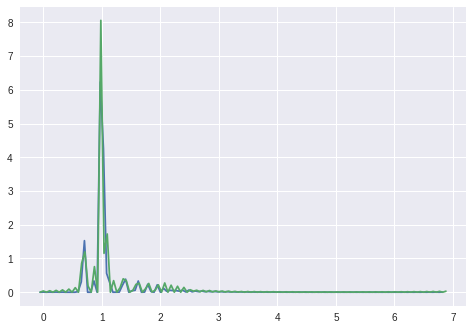

In [42]:
sns.kdeplot(HN)
sns.kdeplot(HD)
plt.show()

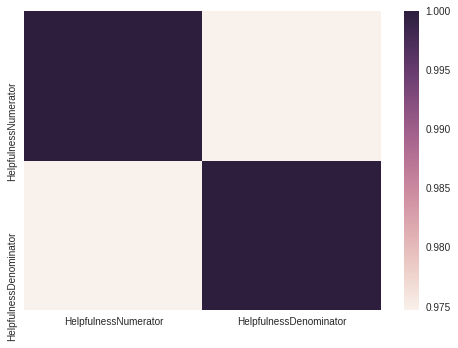

In [25]:
#Correlation between HelpfullnessNumerator and HelpfullnessDenominator

corr=df1.corr()
sns.heatmap(corr)
plt.show()

# How many reviews are helpful?

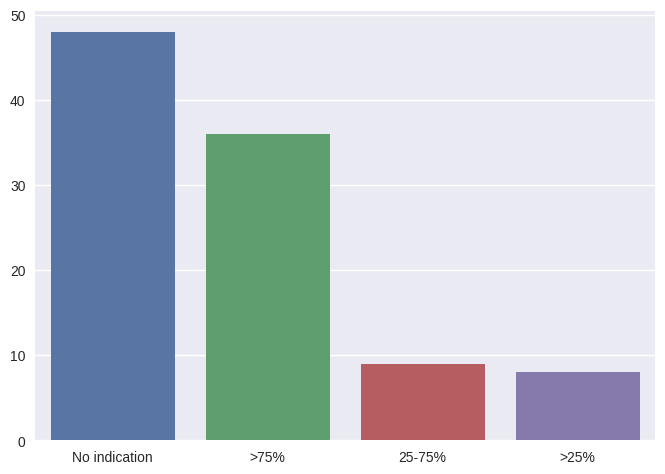

In [17]:

df1 = pd.read_sql_query("""
SELECT HelpfulnessNumerator,HelpfulnessDenominator
FROM Reviews where HelpfulnessDenominator=0
""", con)
helpfullness=[]

x=float(len(df1))
y=float(len(df))

helpfullness.append(int(round(x/y*100)))

df2 = pd.read_sql_query("""
SELECT HelpfulnessNumerator,HelpfulnessDenominator from Reviews where HelpfulnessDenominator NOT IN(
SELECT HelpfulnessDenominator
FROM Reviews where HelpfulnessDenominator=0)
""", con)


df2['result']=df2['HelpfulnessNumerator']/df2['HelpfulnessDenominator']*100
c=0
c1=0
c2=0
for i in df2['result']:
    if(i>75):
        c+=1
    elif(i<75 and i>25):
        c1+=1
    else:
        c2+=1
helpfullness.append(int(round(c/y*100))) 
helpfullness.append(int(round(c1/y*100))) 
helpfullness.append(int(round(c2/y*100))) 
x=['No indication','>75%','25-75%','>25%']
sns.barplot(x,y=helpfullness)
plt.show()

<pre>
Most of the people 48% are not rated
Next most is 75% of reviews are helpful upto 37%
</pre>

# How do ratings affect helpfulness?

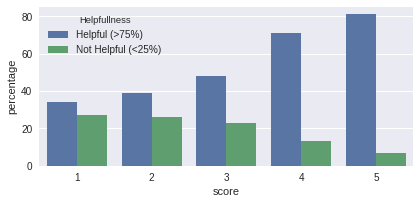

In [29]:
df4 = pd.read_sql_query("""
SELECT Score,HelpfulnessNumerator,HelpfulnessDenominator from Reviews where HelpfulnessDenominator NOT IN(
SELECT HelpfulnessDenominator
FROM Reviews where HelpfulnessDenominator=0)
""", con)



helpN=df2['result']


h=[0,0,0,0,0]
nh=[0,0,0,0,0]
count=[0,0,0,0,0]

k=0
for i in df4['Score']:
    if(i==5):
        count[i-1]+=1
        if(helpN[k]>75):
            h[i-1]+=1
        elif(helpN[k]<25):
            nh[i-1]+=1
    elif(i==4):
        count[i-1]+=1
        if(helpN[k]>75):
            h[i-1]+=1
        elif(helpN[k]<25):
            nh[i-1]+=1
    elif(i==3):
        count[i-1]+=1
        if(helpN[k]>75):
            h[i-1]+=1
        elif(helpN[k]<25):
            nh[i-1]+=1
    elif(i==2):
        count[i-1]+=1
        if(helpN[k]>75):
            h[i-1]+=1
        elif(helpN[k]<25):
            nh[i-1]+=1
    else:
        count[i-1]+=1
        if(helpN[k]>75):
            h[i-1]+=1
        elif(helpN[k]<25):
            nh[i-1]+=1
    k+=1
k=0
for i in h:
    h[k]=int(round(i/float(count[k])*100))
    k+=1

k=0
for i in nh:
    nh[k]=int(round(i/float(count[k])*100))
    k+=1

h=h+nh

score=[1,2,3,4,5,1,2,3,4,5]
raw_data={'percentage':h,'score':score}
df_m=pd.DataFrame(raw_data, columns = ['percentage', 'score'])
df_m["hue"] = np.arange(0,len(df_m)) // (len(df_m)//2)

g = sns.factorplot(x="score", y="percentage", hue="hue", data=df_m, size=3,
                     aspect=2, kind="bar", legend_out=False)
leg = g.axes.flat[0].get_legend()
new_title = 'Helpfullness'
leg.set_title(new_title)
new_labels = ['Helpful (>75%)', 'Not Helpful (<25%)']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.show()

<pre>

As the rating becomes more positive, the reviews become more helpful (and less unhelpful).
For 1-star reviews voted upon, 
34% were voted helpful, 
while 27% were found not helpful. 
For 5-star reviews, 81% were found helpful and 7% not helpful.

</pre>

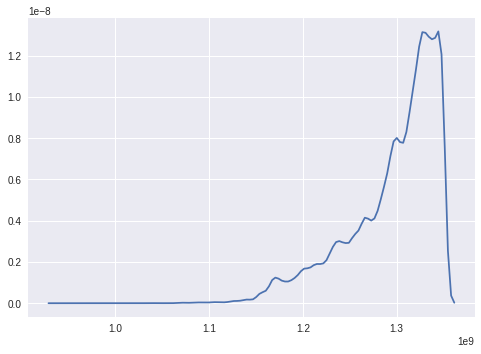

In [44]:
time=np.array(df_m['Time'])
sns.kdeplot(time)
plt.show()

# How does word count vary by rating?

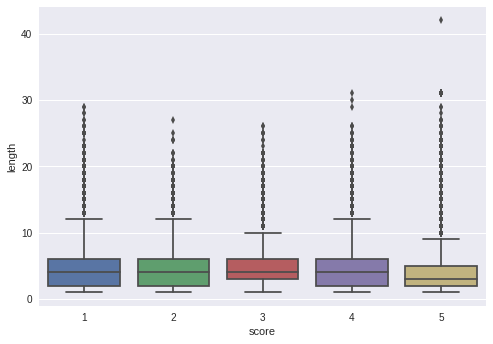

In [11]:

r= pd.read_sql_query("""
SELECT Score,Summary
FROM Reviews
""", con)

text=r['Summary']
score=r['Score']
cou=[]
k=0
for i in score:
    z=len(text[k].split())
    cou.append(z)
    k+=1

dflen=pd.DataFrame({'score': score,
     'length': cou,})

dflen = dflen[dflen.length <200]

ax=sns.boxplot(x="score",y="length",data=dflen)
plt.show()


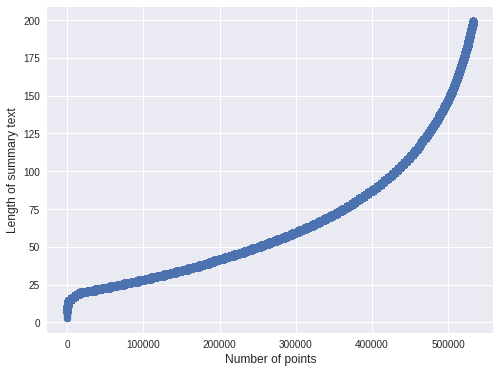

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(range(dflen.shape[0]), np.sort(dflen.length.values))
plt.xlabel('Number of points', fontsize=12)
plt.ylabel('Length of summary text', fontsize=12)
plt.show()


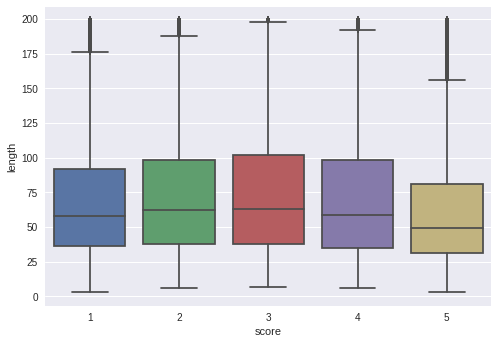

In [12]:

r= pd.read_sql_query("""
SELECT Score,Text
FROM Reviews
""", con)

text=r['Text']
score=r['Score']
cou=[]
k=0
for i in score:
    z=len(text[k].split())
    cou.append(z)
    k+=1

dflen=pd.DataFrame({'score': score,
     'length': cou,})

dflen = dflen[dflen.length <200]

ax=sns.boxplot(x="score",y="length",data=dflen)
plt.show()


 <pre>
 5-star reviews had the lowest median word count (53 words), 
 while 3-star reviews had the largest median word count (71 words).
 </pre>

# Are frequent reviewers more discerning?

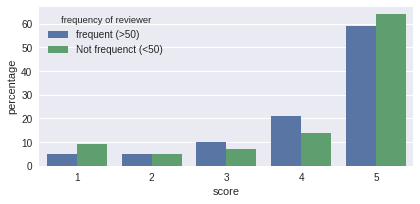

In [23]:
frequency= pd.read_sql_query("""
SELECT count(score) as count,score from Reviews where UserId IN(
SELECT UserId
FROM Reviews group by UserId having count(Text)>50) group by score
""", con)

frequencyl= pd.read_sql_query("""
SELECT count(score) as count,score from Reviews where UserId IN(
SELECT UserId
FROM Reviews group by UserId having count(Text)<=50) group by score
""", con)

fc=0
fcl=0
for i in frequency['count']:
    fc=fc+i
for i in frequencyl['count']:
    fcl=fcl+i
    

freq=[]
freql=[]
for i in frequency['count']:
    freq.append(int(round(i/float(fc)*100)))

for i in frequencyl['count']:
    freql.append(int(round(i/float(fcl)*100)))

freq=freq+freql

score=[1,2,3,4,5,1,2,3,4,5]
raw_data={'percentage':freq,'score':score}
df_m=pd.DataFrame(raw_data, columns = ['percentage', 'score'])
df_m["hue"] = np.arange(0,len(df_m)) // (len(df_m)//2)

g = sns.factorplot(x="score", y="percentage", hue="hue", data=df_m, size=3,
                     aspect=2, kind="bar", legend_out=False)
leg = g.axes.flat[0].get_legend()
new_title = 'frequency of reviewer'
leg.set_title(new_title)
new_labels = ['frequent (>50)', 'Not frequenct (<50)']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.show()

<pre>

Frequent reviewers give less 5-star reviews and less 1-star review.
Frequent users appear to be more discerning in the sense that they give less extreme reviews than infrequent reviews.
</pre>

# Are frequent reviewers more helpful?


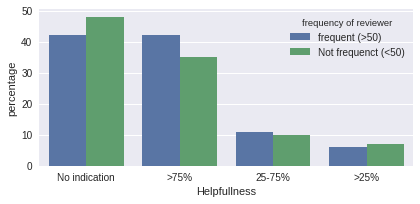

In [53]:
HF= pd.read_sql_query("""
SELECT count(*) as count from Reviews where UserId IN(
SELECT UserId
FROM Reviews group by UserId having count(Text)>50) and HelpfulnessDenominator=0
""", con)

HF1= pd.read_sql_query("""
SELECT count(*) as count from Reviews where UserId IN(
SELECT UserId
FROM Reviews group by UserId having count(Text)>50)
""", con)
h=[]
h1=[]

h.append(int(round(HF['count']/float(HF1['count'])*100)))
HF2= pd.read_sql_query("""
SELECT HelpfulnessNumerator,HelpfulnessDenominator from Reviews where UserId IN(
SELECT UserId
FROM Reviews group by UserId having count(Text)>50) and HelpfulnessDenominator!=0
""", con)

HF2['result']=HF2['HelpfulnessNumerator']/HF2['HelpfulnessDenominator']*100

c=0
c1=0
c2=0
for i in HF2['result']:
    if(i>75):
        c+=1
    elif(i<=75 and i>25):
        c1+=1
    else:
        c2+=1
h.append(int(round(c/HF1['count']*100)))
h.append(int(round(c1/HF1['count']*100)))
h.append(int(round(c2/HF1['count']*100)))



HF= pd.read_sql_query("""
SELECT count(*) as count from Reviews where UserId IN(
SELECT UserId
FROM Reviews group by UserId having count(Text)<50) and HelpfulnessDenominator=0
""", con)

HF1= pd.read_sql_query("""
SELECT count(*) as count from Reviews where UserId IN(
SELECT UserId
FROM Reviews group by UserId having count(Text)<50)
""", con)

HF2= pd.read_sql_query("""
SELECT HelpfulnessNumerator,HelpfulnessDenominator from Reviews where UserId IN(
SELECT UserId
FROM Reviews group by UserId having count(Text)<50) and HelpfulnessDenominator!=0
""", con)
h1.append(int(round(HF['count']/float(HF1['count'])*100)))
HF2['result']=HF2['HelpfulnessNumerator']/HF2['HelpfulnessDenominator']*100

c=0
c1=0
c2=0
for i in HF2['result']:
    if(i>75):
        c+=1
    elif(i<=75 and i>25):
        c1+=1
    else:
        c2+=1

h1.append(int(round(c/HF1['count']*100)))
h1.append(int(round(c1/HF1['count']*100)))
h1.append(int(round(c2/HF1['count']*100)))

h=h+h1

score=['No indication','>75%','25-75%','>25%','No indication','>75%','25-75%','>25%']
raw_data={'percentage':h,'Helpfullness':score}
df_m=pd.DataFrame(raw_data, columns = ['percentage', 'Helpfullness'])
df_m["hue"] = np.arange(0,len(df_m)) // (len(df_m)//2)

g = sns.factorplot(x="Helpfullness", y="percentage", hue="hue", data=df_m, size=3,
                     aspect=2, kind="bar", legend_out=False)
leg = g.axes.flat[0].get_legend()
new_title = 'frequency of reviewer'
leg.set_title(new_title)
new_labels = ['frequent (>50)', 'Not frequenct (<50)']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

plt.show()

<pre>

Frequent reviewers are more likely to have their review voted on and when voted on, more likely to be voted helpful, and less likely to be unhelpful.

</pre>

# Word Cloud

In [8]:
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

df["Summary_Clean"] = df["Summary"].apply(cleanup)


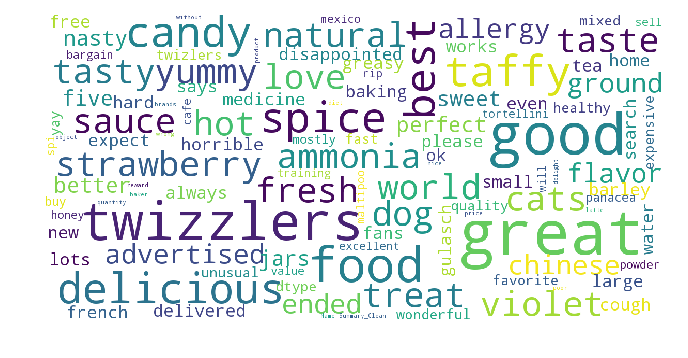

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
stopwords = set(STOPWORDS)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df["Summary_Clean"])


# Word Cloud for rating 5

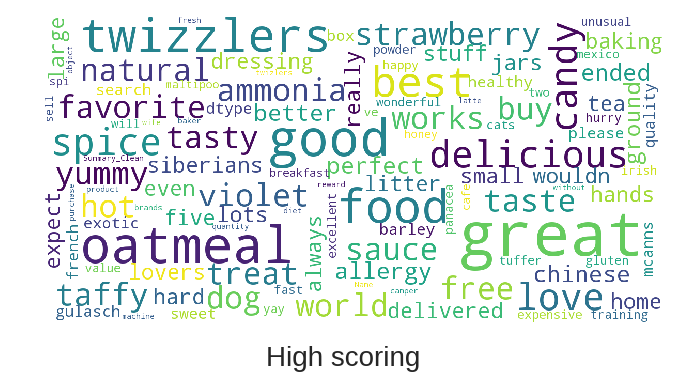

In [13]:
show_wordcloud(df[df.Score == 5]["Summary_Clean"], title = "High scoring")